>Артём, приветствую! Меня зовут Кудрявцев Александр и я буду проверять твой проект.
>
>Если ты непротив, мне было бы удобнее общаться на "ты" во время проверки проекта :)
>
>Ниже в ноутбуке будут мои комментарии, закодированные разными цветами.
>
>**_<span style="color:green">Зеленым будут выделены места, которые хочется особенно отметить, как хорошие. </span>_**
>
> **_<span style="color:red">Недочеты, откомментированные красным обязательны к доработке – без их исправления проект не будет зачтен. </span>_**
>  
> **_<span style="color:orange">Недочеты и подсказки, откомментированные оранжевым, учесть желательно, но их доработка не является обязательным условнием для зачета.</span>_**
>
> Если какие-то подзадачи не откомментированны – значит с ними все окей, нет возражений.
>
> Если ошибка влечет за собой дальнейшие неточности рассчетов или выводов – пожалуйста, поправь их тоже, чтобы аналитический отчет был целостным.
>
>Пожалуйста, не удаляй и не переноси мои комментарии, это позволит лучше ориентироваться при возможных повторных проверках.

автор artyom-ivanov-spb@yandex.ru

<b>ЗАДАЧА</b>

Для двух наборов данных -- query_1 и query_3 -- нужно:

импортировать файлы;

изучить данные в них;

проверить типы данных на корректность;

выбрать топ-10 городов по количеству рейсов;

построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;

сделать выводы по каждому из графиков, пояснить результат.


fgfgfgfgfgfgfg

<b>Оглавление</b>

[1 Импорт данных](#first)

[2 Проверка данных](#second)

[3 Анализ данных](#third)

[3.1 Гистограмма количества рейсов в зависимости от модели самолета](#third-one)

[3.2 Гистограмма среднего количества рейсов по всем городам](#third-two)

[3.3 Гистограмма среднего количества рейсов по топ-10 направлениям](#third-three)

[4 Вывод](#summary)

# 1 Импорт данных <a class="anchor" id="first"></a>

In [1]:
import pandas as pd
import numpy as np

try: 
    query_1_data = pd.read_csv('/datasets/query_1.csv')
    query_3_data = pd.read_csv('/datasets/query_3.csv')

except:
    query_1_data = pd.read_csv('/home/artyom/datasets/query_1.csv')
    query_3_data = pd.read_csv('/home/artyom/datasets/query_3.csv')

dataset_list = [query_1_data, query_3_data]

dataset_list

[                 model  flights_amount
 0      Airbus A319-100             607
 1      Airbus A321-200             960
 2       Boeing 737-300             630
 3       Boeing 767-300             600
 4       Boeing 777-300             300
 5   Bombardier CRJ-200            4446
 6   Cessna 208 Caravan            4557
 7  Sukhoi SuperJet-100            4185,
                city  average_flights
 0            Абакан         3.870968
 1           Анадырь         1.000000
 2             Анапа         2.161290
 3       Архангельск         5.354839
 4         Астрахань         2.451613
 ..              ...              ...
 96             Чита         1.580645
 97           Элиста         4.870968
 98   Южно-Сахалинск         4.290323
 99           Якутск         2.741935
 100       Ярославль         1.322581
 
 [101 rows x 2 columns]]

Импортировали данные. Проверим датасеты более детально.

# Проверка данных <a class="anchor" id="second"></a>

In [2]:
query_1_data.info()
print('===========')
query_1_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [3]:
query_3_data.info()
print('===========')
query_3_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


Типы данных в обоих датасетах подходящие. Проверим наличие дубликатов и пропусков в данных.

In [4]:
def count_NaN(dataset, column):
    empty_spaces = dataset[column].isna().sum()
    if empty_spaces > 0:
        print('В столбце {} имеется {} пропущенных значений'.format(column, empty_spaces))
    else:
        print('В столбце {} нет пропущенных значений'.format(column))
    
for dataset in dataset_list:
    for i in dataset:
        count_NaN(dataset, i)

В столбце model нет пропущенных значений
В столбце flights_amount нет пропущенных значений
В столбце city нет пропущенных значений
В столбце average_flights нет пропущенных значений


Проверим на наличие дублирующих строк в данных:

In [5]:
def count_duplicates(dataset):
    duplicates = dataset.duplicated().sum()
    print('В датасете {} имеется дублирующих строк'.format(duplicates))

for dataset in dataset_list:
    count_duplicates(dataset)

В датасете 0 имеется дублирующих строк
В датасете 0 имеется дублирующих строк


<i>В обоих датасетах нет как пропущенных записей, так и дублирующих строк. Данные готовы для анализа.</i>


>**_<span style="color:green">Здесь всё структурировано и по делу, класс. Отдельно отмечу твой комплексный подход по предобработке данных.</span>_**
>
>**_<span style="color:red">~~Общее замечание по оформлению всей работы: разбей ее, пожалуйста, на структурные блоки. Выдели заголовки в ячейках `markdown` для каждого шага, и напиши промежуточные выводы.~~ </span>_**

# 3 Анализ данных <a class="anchor" id="third"></a>

Отсортируем датасет query_3_data по количеству рейсов, и выберем 10 наиболее популярных направлений

In [6]:
query_3_data = query_3_data.sort_values(by='average_flights', ascending=False).reset_index(drop = True)

query_3_data.head(10)

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


Нашли топ-10 направлений

построим графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;

## Гистограмма количества рейсов в зависимости от модели самолета <a class="anchor" id="third-one"></a>

In [7]:
import matplotlib.pyplot as plt

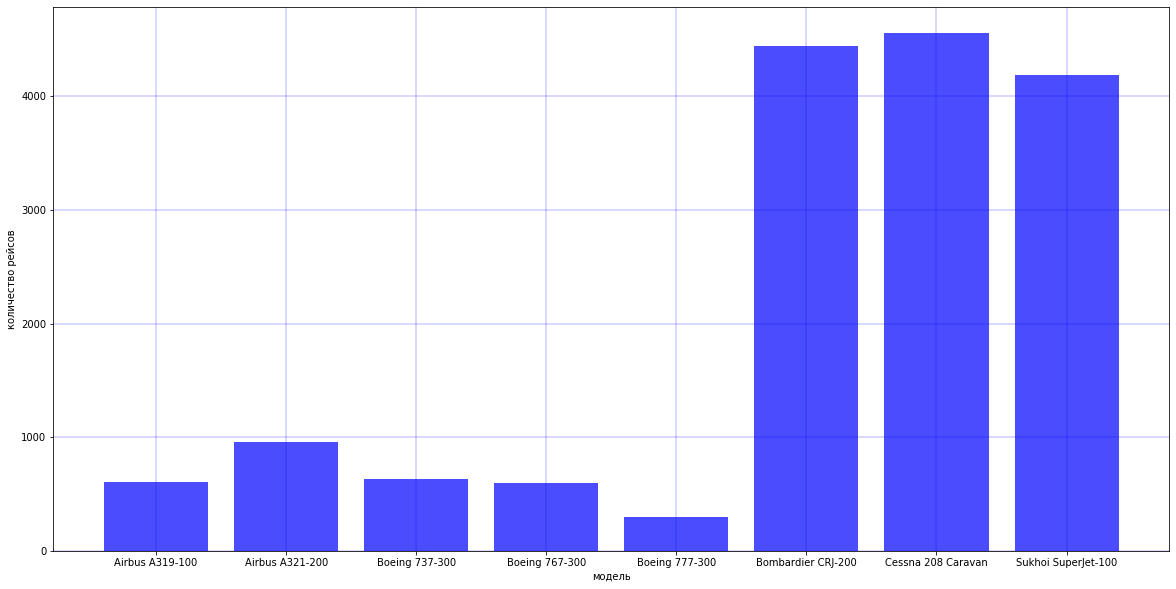

In [8]:
fig = plt.figure(figsize = (20, 10))

ax1 = fig.add_subplot()
ax1.set_ylabel('количество рейсов')
ax1.set_xlabel('модель')

plt.bar(query_1_data['model'], query_1_data['flights_amount'], color='blue', alpha = 0.7)

plt.grid(color='b', linestyle='-', linewidth=0.3)

plt.show()

Из графика видно, что больше всего перелётов осуществлялось на регилональных легкомоторных моделях -- Bombardier CRJ-200 и Cessna 208 Caravan. Среднемагистральный самолет Sukhoi SuperJet-100 занимает третье место по числу выполненных рейсов. Лишь малая часть рейсов выполнялась на средне и дальнемагистральных моделях Airbus и Boeing. Меньше всего рейсов выполнялось на дальнемагистральном Boeing 777-300. 

Это может отражать картину авиапарка, оперируемого российскими авиакоманиями. Лишь немногие авиакомпании могут позволить себе эксплуатировать дорогие модели Airbus и Boeing.

>**_<span style="color:green">Здесь всё супер, полностью согласен с твоими гипотезами. Не забудь, пожалуйста, добавить название графика.</span>_**

## Гистограмма среднего количества рейсов по всем городам <a class="anchor" id="third-two"></a>

In [9]:
import plotly.express as px #импортируем библиотеку plotly для построения графиков

Построим гистограмму среднего количества выполненных рейсов по городам РФ.

In [2]:
fig = px.histogram(query_3_data, x="city", y="average_flights", color = 'city')
fig.show()

NameError: name 'px' is not defined

На интерактивной гистограмме видно, что меньше всего рейсов выполняется в:
    
    Усть-Кут,
    
    Комсомольск-на-Амуре,
    
    Стрежевой,
    
    Нефтеюганск,
    
    Петропавловск-Камчатский,
    
    Анадырь,
    
    Ижевск,
    
    Братск,
    
    Иваново,
    
    Нягань,
    
    Усинск,
    
    Благовещенск.
    
    
    Ожидаемые лидеры по количеству рейсов -- Москва и Санкт-Петербург.

>**_<span style="color:red">~~Этот график, несмотря на всю интерактивность, выглядит нечитаемым. Я бы предложил тебе отразить его в вертикальной ориентации и нужно разобраться с тем, что все колонки одинаковой высоты (у нас везде единица в значениях). Также не забудь, пожалуйста, про оформление.~~</span>_**

>**_<span style="color:blue">Добрый день. Здесь, вероятно, какая-то ошибка отображения, поскольку у меня данный график построился корректно. Прикрепляю скриншот. http://joxi.ru/52aPNgJik6E45m
<br>    
В веб-версии Jupiter столбцы графика действительно получились одной высоты, со значением равным единице. Я выполняю работу локально, в клиенте Anaconda Navigator для ОС Linux. Принична таких расхождений мне не известна, за не именеием прочих данных прошу зачесть эти моменты. Более того, если бы графики изначально были построены не верно, я бы не смог сформировать по ним выводы.
<br> 
Для примера, ниже выполню построение аналогичной гистограммы альтернативным, но менее наглядным и удобным способом.
</span>_**
>
>>**_<span style="color:green">Update: видимо есть какие проблемы с локалью, возможно проблема в разделителях (запятая, точка).</span>_**

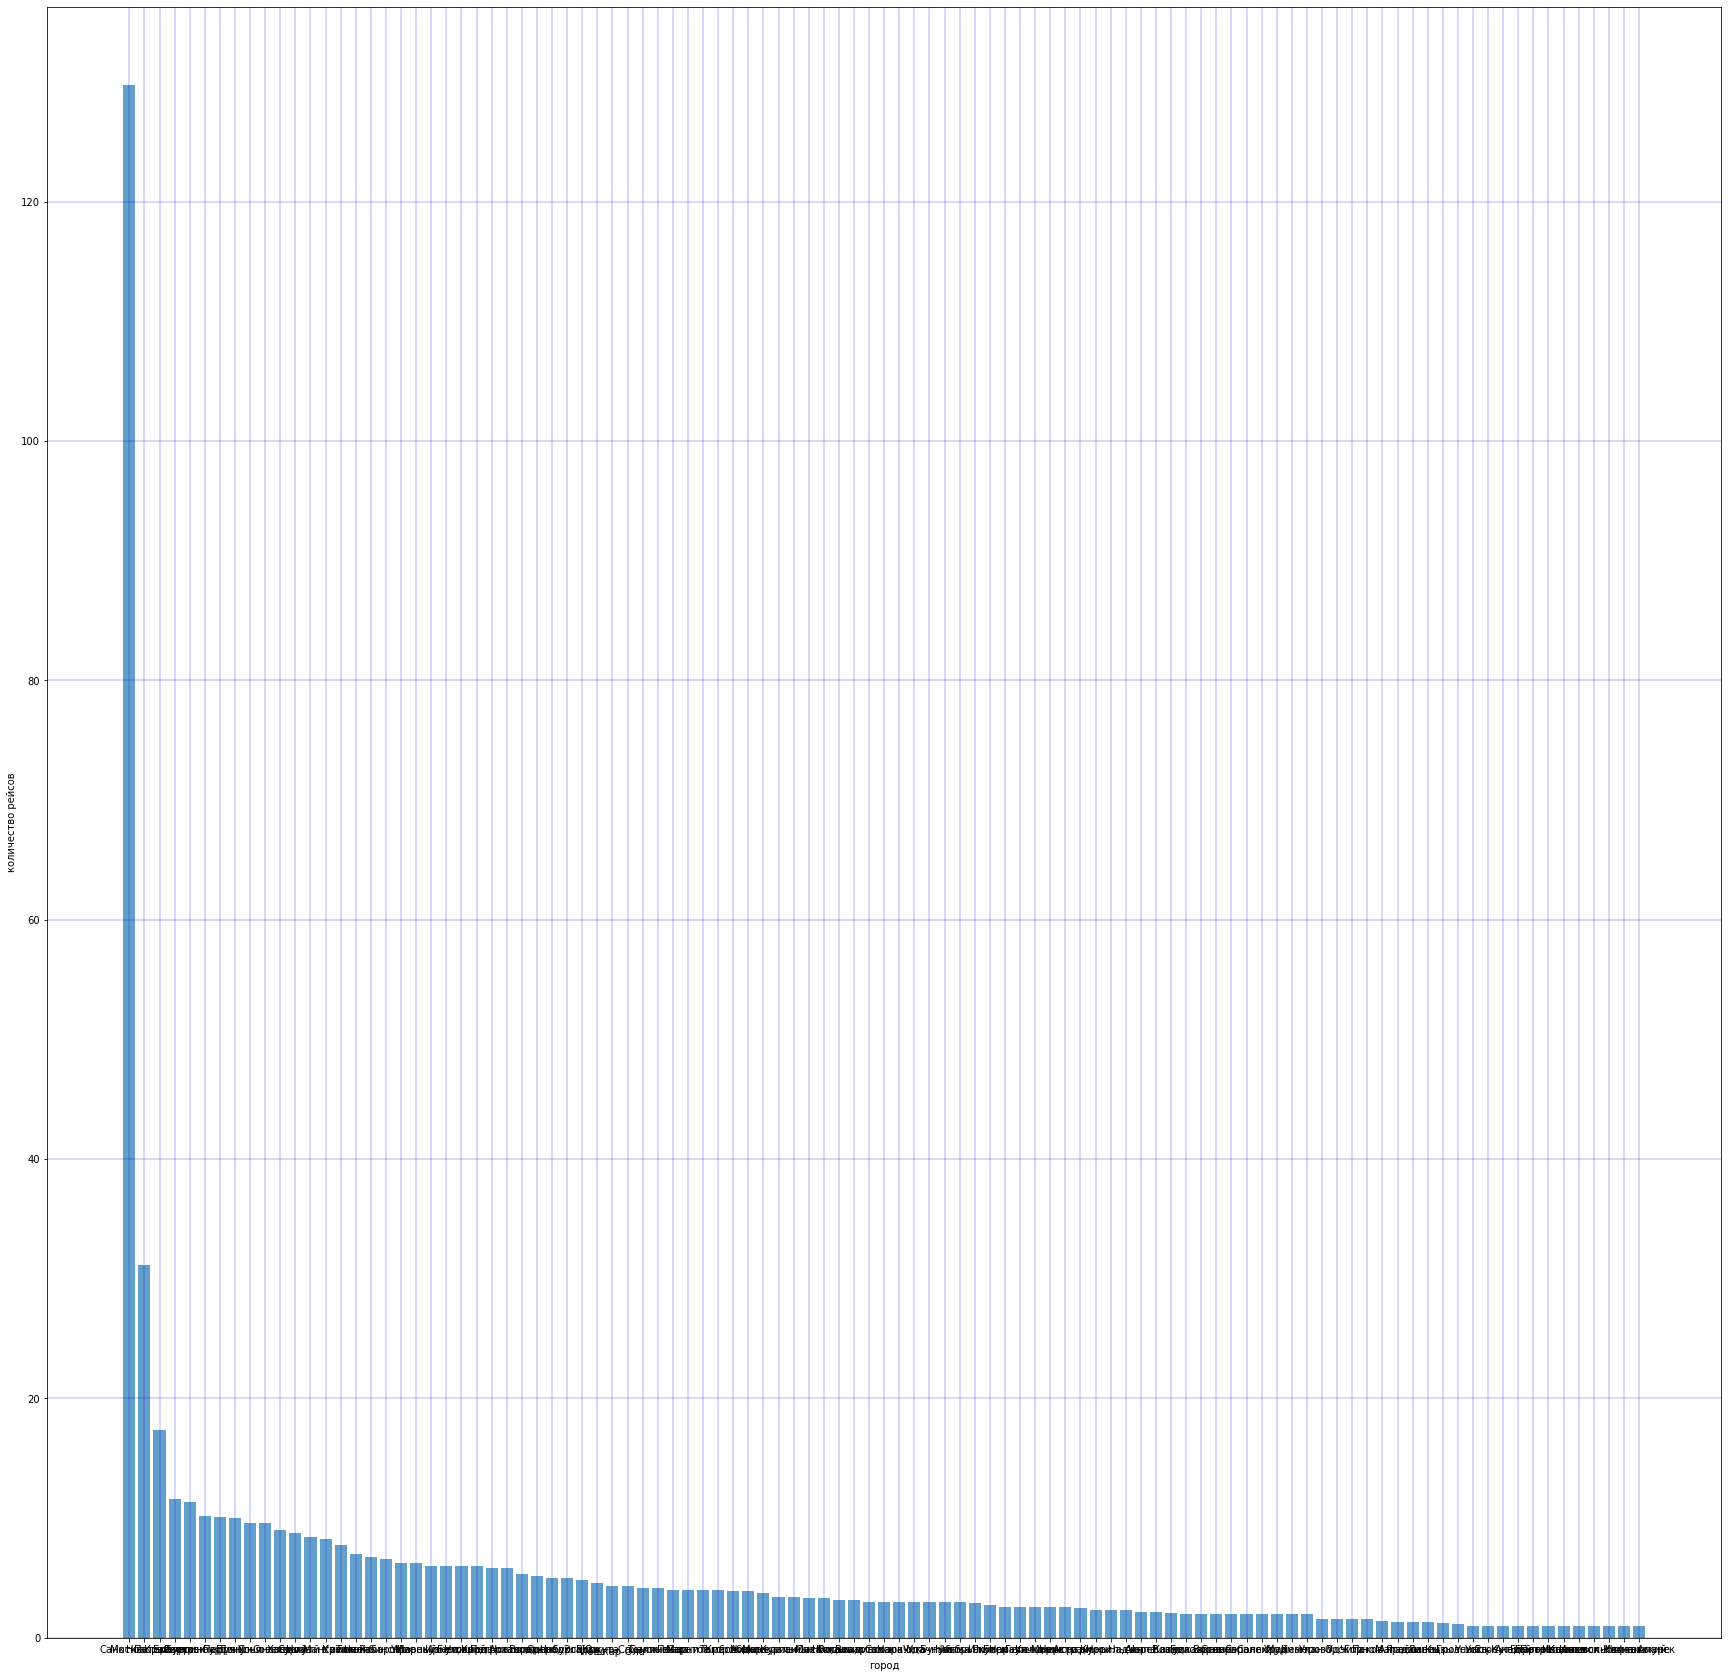

In [11]:
fig = plt.figure(figsize = (30, 30))

ax1 = fig.add_subplot()
ax1.set_ylabel('количество рейсов')
ax1.set_xlabel('город')

plt.bar(query_3_data['city'], query_3_data['average_flights'], alpha = 0.7)

plt.grid(color='b', linestyle='-', linewidth=0.3)

plt.show()

Подготовим датасет для построения гистограммы по топ-10 направлениям.

In [12]:
query_3_data_top_10 = query_3_data.loc[0:9] #сделали срез по топ-10 направлениям, и сохранили в отдельный датасет

query_3_data_top_10

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


Проверим статистику рейсов по наиболее популярным 10 направлениям

## Гистограмма среднего количества рейсов по топ-10 направлениям <a class="anchor" id="third-three"></a>

In [13]:
fig = px.histogram(query_3_data_top_10, x="city", y="average_flights", color = 'city')
fig.show()

Москва -- крупный пересадочный узел с 3 аэропортами, обгоняет Санкт-петербург по числу рейсов почти в 4 раза. Следом, Новосибирск -- принимает почти в двое меньше рейсов, чем аэропорт Пулково в Санкт-Петербурге. Наименее популярным направлением из топ-10 является Ульяновск.

>**_<span style="color:red">~~Аналогично, у нас везде единица. Нужно проверить, и добавить твои гипотезы касательно именно этих городов в "топе".~~</span>_**

>**_<span style="color:blue">Аналогично графику выше, прикрепляю скриншот корректного отображения в локальной версии. http://joxi.ru/Vrw7WEpf4B775r 
<br>
Альтернативный способ построения графика прикрепил ниже</span>_**

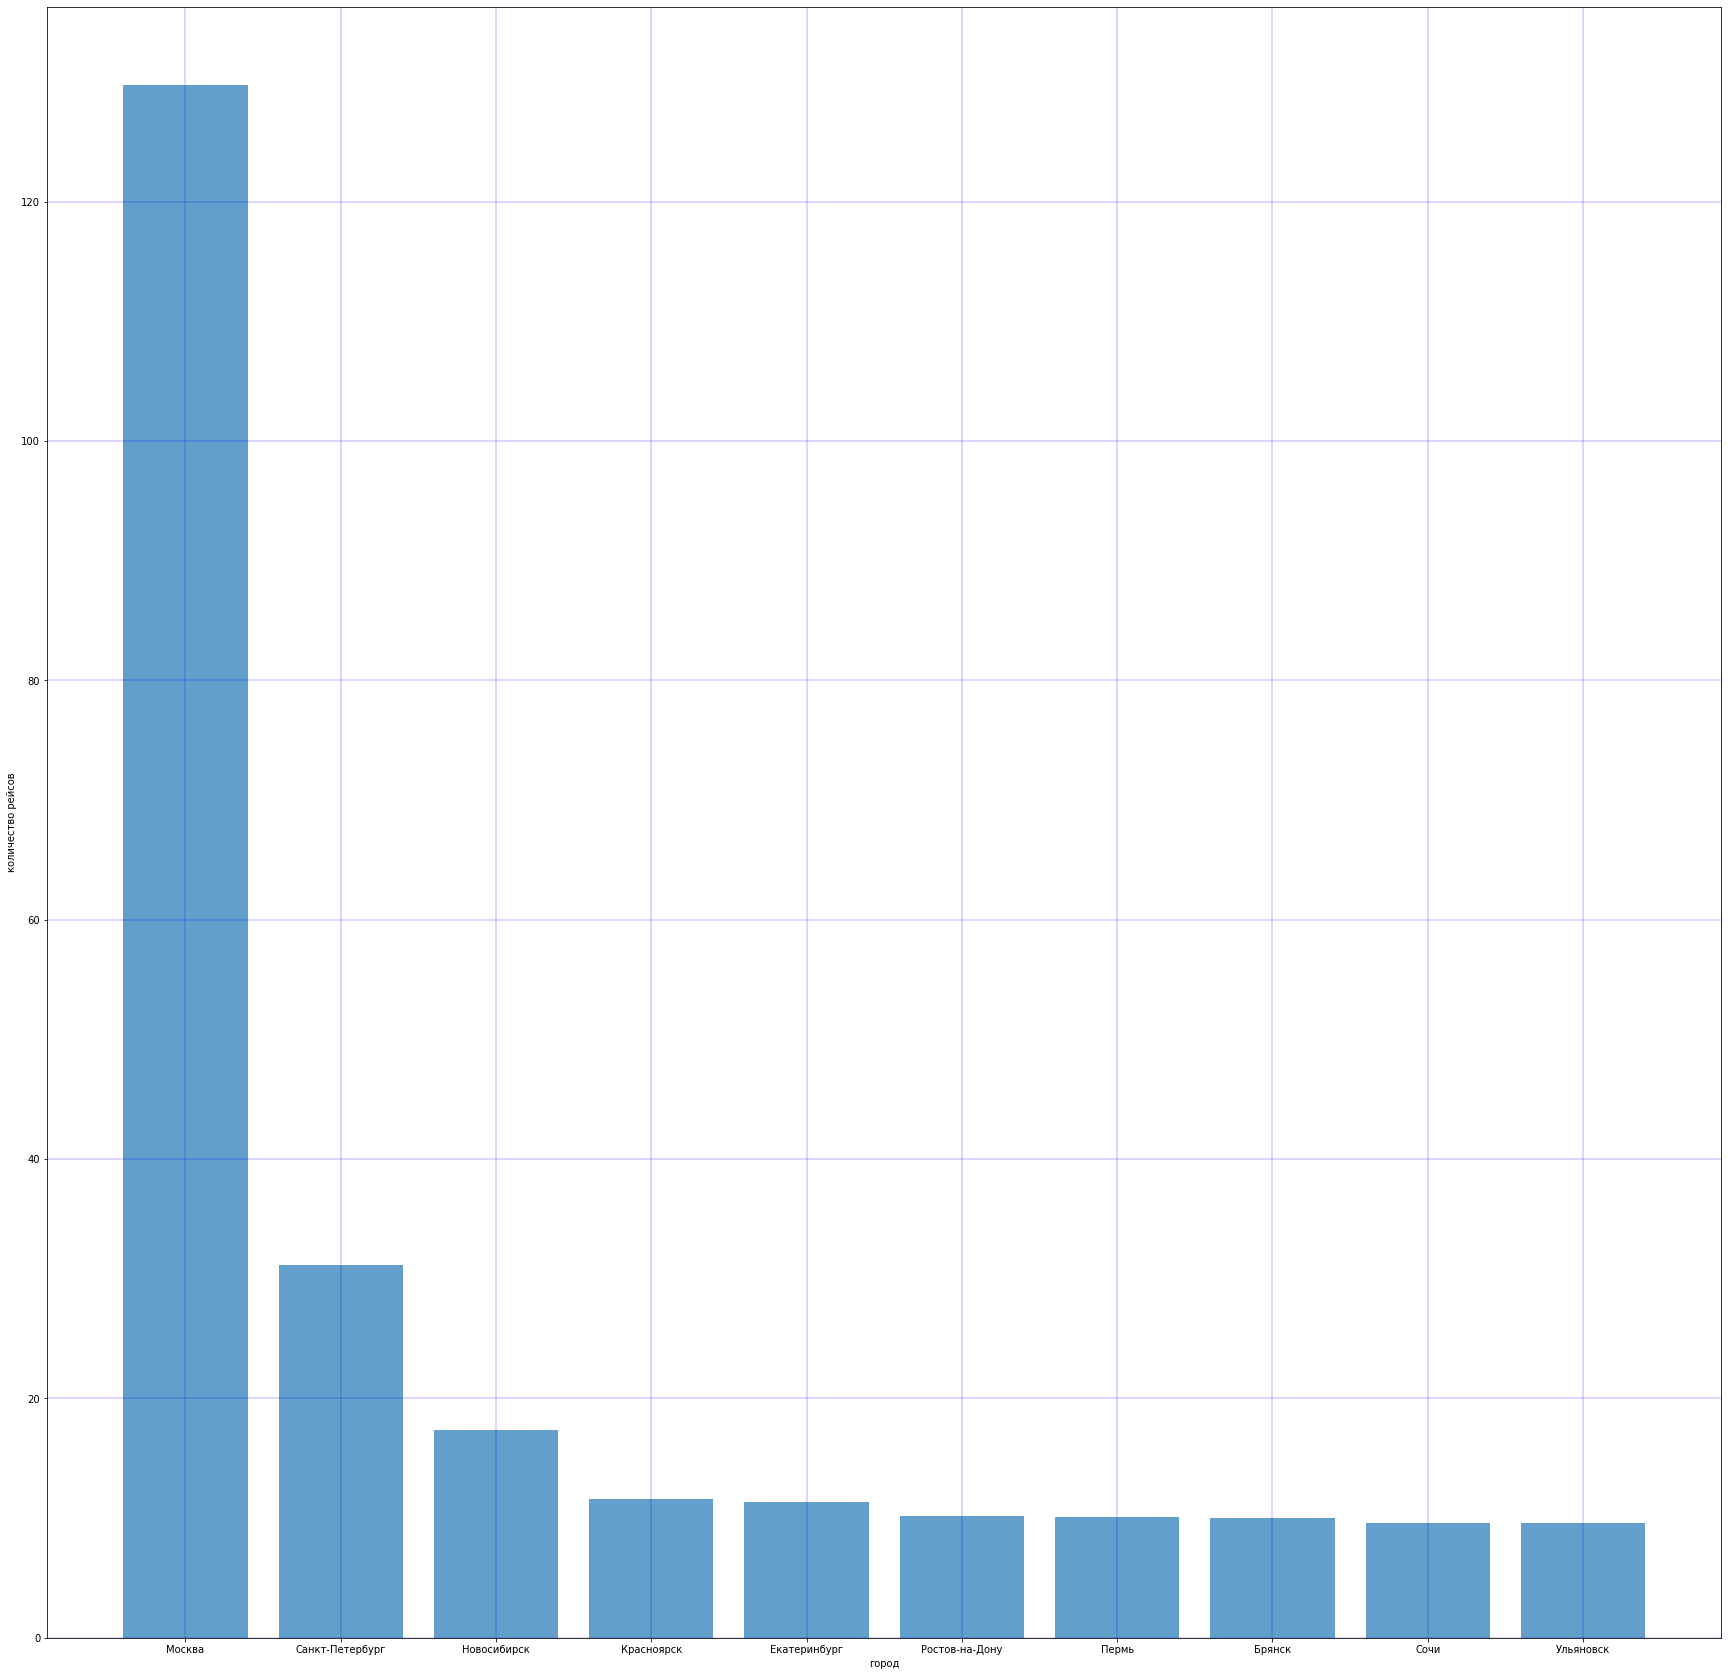

In [14]:
fig = plt.figure(figsize = (30, 30))

ax1 = fig.add_subplot()
ax1.set_ylabel('количество рейсов')
ax1.set_xlabel('город')

plt.bar(query_3_data_top_10['city'], query_3_data_top_10['average_flights'], alpha = 0.7)

plt.grid(color='b', linestyle='-', linewidth=0.3)

plt.show()

<b>ВЫВОД</b> <a class="anchor" id="summary"></a>

На основании собранных данных, видно, что Москва -- является самым популярным направлением внутри России, со значительным отставанием вторую и третюю позицию занимают Санкт-Петербург и Новосибирск. Больше всего рейсов внутри России происходит на легкомоторных и среднемагистральных самолетах, меньше всего -- на среднемагистральных и дальнемагистральных Airbus и Boeing.

>**Спасибо тебе за сдачу твоего проекта. Видно, что ты хорошо справился с материалами спринта и уверенно применяешь полученные навыки на практике. Но для зачёта проекта тебе нужно еще поработать и исправить ряд недочётов в твоей работе.**
>
>**Буду ждать твой доделанный проект на повторную проверку. Успехов!**
>
>**Update: Привет еще раз! Видимо есть какая-то несостыковка версий библиотек или локалей. Теперь всё отлично, и твой проект зачтен. На будущее советую тебе не забывать про оформление графиков - это будет хорошей практикой.**